In [120]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

# START

In [121]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel
import pandas as pd
from quetzal.engine.pathfinder_utils import efficient_od_sets

In [122]:
training_folder = '../../'
plot_path = training_folder + 'outputs/plot/'

In [123]:
sm = stepmodel.read_zippedpickles(training_folder + r'model/{scen}/walk_model'.format(scen=scenario))

zone_to_transit: 100%|█████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 27.23it/s]


In [124]:
#import volume pour utilisation nouvelles methodes
distribution = stepmodel.read_zippedpickles((training_folder + r'model/{scen}/distribution'.format(scen=scenario)))
sm.volumes = distribution.volumes

volumes: 100%|██████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 495.49it/s]


In [125]:
# add required fields
sm.links['length'] = sm.links['road_length']

In [126]:

tc = sm.copy()

## BEST PATHS

In [127]:
cutoff=6000

In [128]:
tc.step_pt_pathfinder(
    broken_routes=False,
    broken_modes=False,
    keep_pathfinder=True,
    mode_column='route_type',
    route_column='route_short_name',
    speedup=True,
    cutoff = cutoff,
    walk_on_road=False,#cause we got footpaths
    
    path_analysis=True,
    engine='b', # b is faster
)

ppf = tc.publicpathfinder

path_analysis: 100%|██████████████████████████████████████████████████████████| 12100/12100 [00:00<00:00, 79383.90it/s]


In [132]:
tc.pt_los.head()

,origin,destination,gtime,path,pathfinder_session,reversed,boardings,alightings,node_path,link_path,footpaths,ntlegs,transfers,boarding_links,alighting_links,all_walk,ntransfers,time_link_path,length_link_path
0,zone_0,zone_0,0.000000,"(zone_0,)",best_path,False,[],[],[],[],[],[],[],[],[],True,0,0.0,0.0
1,zone_0,zone_1,1064.869305,"(zone_0, 133, link_4303, 49, zone_1)",best_path,False,[133],[49],"[133, 49]",[link_4303],[],"[(zone_0, 133), (49, zone_1)]",[],[link_4303],[link_4303],False,0,60.0,NaN
2,zone_0,zone_10,1379.130392,"(zone_0, 237, link_3655, 143, link_4523, link_...",best_path,False,"[237, 143]","[143, 126]","[237, 143, 126]","[link_3655, link_4523, link_4524]",[],"[(zone_0, 237), (126, zone_10)]",[143],"[link_3655, link_4523]","[link_3655, link_4524]",False,1,240.0,NaN
3,zone_0,zone_100,1906.800187,"(zone_0, 133, link_4303, link_4304, link_4305,...",best_path,False,"[133, 287, 160, 26]","[287, 160, 26, 246]","[133, 287, 160, 26, 246]","[link_4303, link_4304, link_4305, link_4966, l...",[],"[(zone_0, 133), (246, zone_100)]","[287, 160, 26]","[link_4303, link_4966, link_4406, link_5126]","[link_4305, link_4970, link_4407, link_5126]",False,3,720.0,NaN
4,zone_0,zone_101,2677.295092,"(zone_0, 133, link_4303, link_4304, 12, link_4...",best_path,False,"[133, 12, 229, 134]","[12, 229, 134, 42]","[133, 12, 229, 134, 42]","[link_4303, link_4304, link_4495, link_5387, l...",[],"[(zone_0, 133), (42, zone_101)]","[12, 229, 134]","[link_4303, link_4495, link_5387, link_4725]","[link_4304, link_4495, link_5387, link_4730]",False,3,840.0,NaN


In [130]:
ppf.best_paths

,origin,destination,gtime,path,pathfinder_session,reversed
0,zone_0,zone_0,-1.000000e+09,[zone_0],best_path,False
1,zone_0,zone_1,1.064869e+03,"[zone_0, 133, link_4303, 49, zone_1]",best_path,False
2,zone_0,zone_10,1.379130e+03,"[zone_0, 237, link_3655, 143, link_4523, link_...",best_path,False
3,zone_0,zone_100,1.906800e+03,"[zone_0, 133, link_4303, link_4304, link_4305,...",best_path,False
4,zone_0,zone_101,2.677295e+03,"[zone_0, 133, link_4303, link_4304, 12, link_4...",best_path,False
...,...,...,...,...,...,...
12095,zone_99,zone_95,9.340834e+02,"[zone_99, 299, link_4654, 90, zone_95]",best_path,False
12096,zone_99,zone_96,1.269308e+03,"[zone_99, 299, link_1707, link_1708, link_1709...",best_path,False
12097,zone_99,zone_97,1.198004e+03,"[zone_99, 299, link_1707, link_1708, link_1709...",best_path,False
12098,zone_99,zone_98,1.542898e+03,"[zone_99, 299, link_1707, link_1708, link_1709...",best_path,False


# ROUTE AND MODE BREAKER


In [114]:

rail = tc.links.loc[tc.links['route_type'].isin(['tram', 'subway', 'rail'])] 
#on ne va pas retirer les lignes de bus
broken_routes = rail["route_short_name"].unique()
print('Broken Routes:', broken_routes)


mode_combinations = []
mode_combinations.append(set(tc.links['route_type'].unique()))

for mode in tc.links['route_type'].unique():
    mode_combinations.append({mode})
    
print('Broken Modes Combinaison:', mode_combinations)
#pourquoi par subway,tram?

Broken Routes: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '3B' '7B'
 'T3B' 'T2' 'T3A' 'C' 'D' 'E' 'L' 'A' 'B']
Broken Modes Combinaison: [{'rail', 'bus', 'tram', 'subway'}, {'bus'}, {'subway'}, {'tram'}, {'rail'}]


In [115]:
ppf.combinations = dict()
#Pour correspondre a la focon d'ecrire de quetzal on rename route_short name
ppf.links["route_id"] = ppf.links['route_short_name']
ppf.combinations['route_id'] = [{route} for route in broken_routes]
ppf.combinations['route_type'] = mode_combinations
ppf.build_route_id_sets(first_and_last_only=True)
ppf.build_route_type_sets(first_and_last_only=False)
ppf.build_od_sets()

ppf.splitted_od_sets['route_id'] = {
    c : efficient_od_sets(od_set, factor=0.6, verbose=True) 
    for c, od_set in ppf.od_sets['route_id'].items()
}
ppf.broken_route_paths = pd.DataFrame()
ppf.broken_mode_paths = pd.DataFrame()


#route breajer
ppf.find_broken_combination_paths(column='route_id', cutoff=cutoff, build_shortcuts=False, prune=False)
ppf.broken_route_paths = ppf.broken_combination_paths
ppf.broken_route_paths['pathfinder_session'] = 'route_breaker' 
ppf.broken_route_paths['broken_route'] = ppf.broken_route_paths['broken_route_id'].apply(lambda s: list(s)[0] )

ppf.find_broken_combination_paths(column='route_type', cutoff=cutoff, build_shortcuts=False, prune=False)
ppf.broken_mode_paths = ppf.broken_combination_paths
ppf.broken_mode_paths['pathfinder_session'] = 'mode_breaker'
ppf.broken_mode_paths['broken_modes'] = ppf.broken_mode_paths['broken_route_type'].apply(set)

9 + 8 = 17 < 0.6 * 110 splitting od_set
10 + 9 = 19 < 0.6 * 110 splitting od_set
16 + 14 = 30 < 0.6 * 110 splitting od_set
5 + 5 = 10 < 0.6 * 96 splitting od_set
1 + 1 = 2 < 0.6 * 50 splitting od_set
8 + 6 = 14 < 0.6 * 109 splitting od_set
1 + 2 = 3 < 0.6 * 93 splitting od_set
4 + 4 = 8 < 0.6 * 110 splitting od_set
5 + 5 = 10 < 0.6 * 105 splitting od_set
12 + 11 = 23 < 0.6 * 110 splitting od_set
0 + 0 = 0 >= 0.6 * 0 keeping od_set
14 + 13 = 27 < 0.6 * 110 splitting od_set
8 + 9 = 17 < 0.6 * 110 splitting od_set
5 + 5 = 10 < 0.6 * 110 splitting od_set
1 + 1 = 2 < 0.6 * 8 splitting od_set
12 + 11 = 23 < 0.6 * 110 splitting od_set
7 + 8 = 15 < 0.6 * 110 splitting od_set
5 + 3 = 8 < 0.6 * 104 splitting od_set
3 + 2 = 5 < 0.6 * 105 splitting od_set
12 + 8 = 20 < 0.6 * 110 splitting od_set
7 + 7 = 14 < 0.6 * 110 splitting od_set
0 + 1 = 1 >= 0.6 * 1 keeping od_set
13 + 14 = 27 < 0.6 * 110 splitting od_set
9 + 9 = 18 < 0.6 * 110 splitting od_set
11 + 11 = 22 < 0.6 * 110 splitting od_set


route_type {'subway'}: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.55it/s]


In [116]:
pt_los = pd.concat([
    ppf.best_paths,
    ppf.broken_mode_paths, 
    ppf.broken_route_paths, 
    ]
)
pt_los['path'] = [tuple(p) for p in pt_los['path']]
pt_los = pt_los.drop_duplicates(subset=['path'])
print(len(pt_los))
tc.pt_los = pt_los
pt_los.set_index(['origin', 'destination'])['pathfinder_session'].value_counts()

51697


mode_breaker     26779
route_breaker    12818
best_path        12100
Name: pathfinder_session, dtype: int64

# CONCATENATION

In [97]:
tc.pt_los["time"]=tc.pt_los["gtime"]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.80s/it]


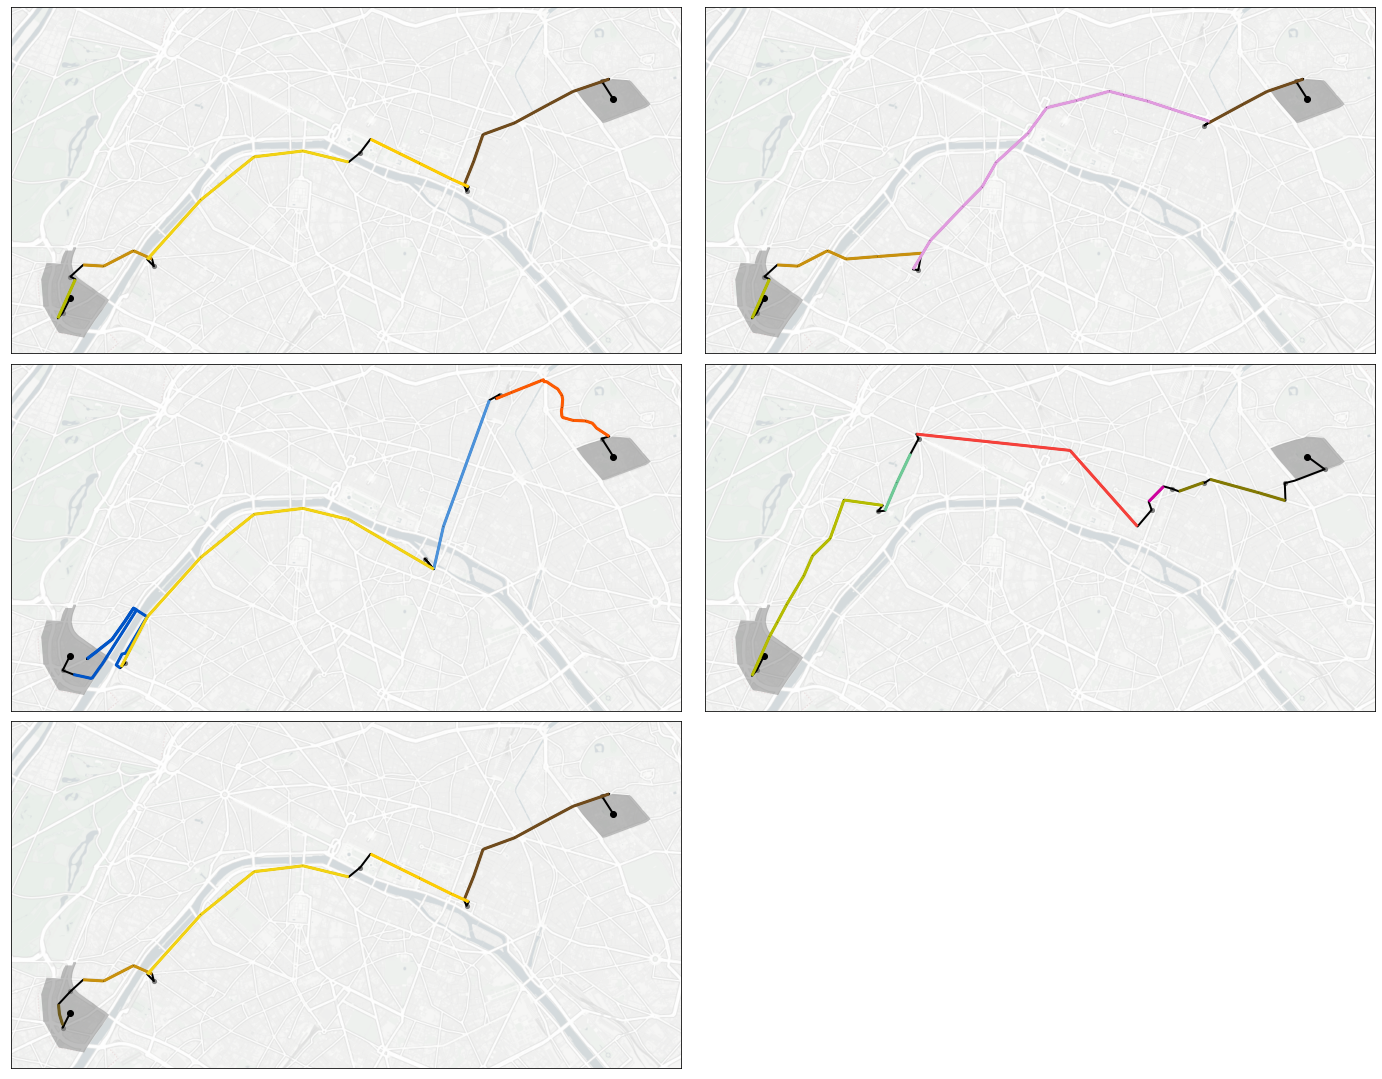

In [98]:
tc.links['color'] = '#' + tc.links['route_color']
origin, destination='zone_74',  'zone_105'
rows = 3
fig, axes = tc.plot_separated_paths(
    origin, destination, rows=rows, figsize=[20, 20],
    title=None, constrained_layout=True, zoom=13, resize=True,
    basemap_url='http://a.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png', 
)

In [99]:
tc.to_zippedpickles((training_folder + 'model/{scen}/pruning_pt_pathfinder'.format(scen=scenario)))

pt_los: 100%|██████████████████████████████████████████████████████████████████████████| 32/32 [00:03<00:00,  9.49it/s]


# END